# Lecture 02 - Student Notebook

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats
from scipy.stats import skewnorm
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.preprocessing import LabelEncoder 


DATA_DIR = "./../../data"

Download the data from the Drive folder and put it in the data folder. 

In [2]:
# Aggregated features
df = pd.read_csv('{}/aggregated_fc.csv'.format(DATA_DIR))
df.head()

,user,grade,gender,category,year,sessions,time_in_problem,time_in_video,lecture_delay,content_anticipation,mean_playback_speed,relative_video_pause,submissions,submissions_correct,clicks_weekend,clicks_weekday
0,0,4.50,NaN,NaN,Y2-2018-19,19.0,23344.0,29518.0,55068.387500,0.006061,0.968519,0.137436,30.0,20.0,168.0,381.0
1,1,4.50,M,Suisse.Autres,Y2-2018-19,34.0,16984.0,92278.0,-2883.367738,0.009091,1.122014,0.361389,90.0,59.0,40.0,1794.0
2,2,5.25,M,Suisse.PAM,Y2-2018-19,53.0,23406.0,108013.0,10027.216667,0.237488,0.807090,0.272210,61.0,30.0,946.0,1292.0
3,3,4.50,F,Suisse.Autres,Y2-2018-19,28.0,27371.0,81855.0,27596.864484,0.011879,0.500000,0.151223,46.0,32.0,135.0,464.0
4,4,4.75,F,France,Y2-2018-19,25.0,37873.0,70400.0,-914.633333,0.290421,0.846794,0.196403,3.0,1.0,584.0,649.0


In [3]:
# Time series features
ts = pd.read_csv('{}/time_series_fc.csv'.format(DATA_DIR))
ts.head()

,week,user,sessions,time_in_problem,time_in_video,lecture_delay,content_anticipation,mean_playback_speed,relative_video_pause,submissions,submissions_correct,clicks_weekend,clicks_weekday
0,0,0,4.0,5682.0,6417.0,-24339.200000,0.015152,1.539474,0.315217,8.0,4.0,12.0,102.0
1,0,1,7.0,326.0,15525.0,4492.833333,0.090909,1.319288,0.345528,7.0,4.0,40.0,227.0
2,0,2,4.0,1224.0,12209.0,-8998.000000,0.060606,1.000000,0.230415,13.0,8.0,1.0,258.0
3,0,3,11.0,3517.0,26500.0,-33102.111111,0.045455,1.000000,0.301887,17.0,10.0,10.0,141.0
4,0,4,4.0,1294.0,12037.0,-9146.333333,0.181818,1.184140,0.267606,3.0,1.0,140.0,46.0


## Some useful functions

In [4]:
def plot_features(df, hue = None):
    continuous_cols = list(df._get_numeric_data().columns)
    categorical_cols =  list(df.select_dtypes(include=['O']).columns.values)

    rows = np.ceil(len(df.columns)/3).astype(int)
    fig, axes = plt.subplots(rows, 3, figsize=(15,5*rows))
    for i, col in enumerate(df.columns):
        ax = axes[i // 3, i % 3]
        if col in continuous_cols:
            sns.histplot(data=df, x = col, ax=ax,  kde=True, hue= hue) 
        elif col in categorical_cols:
            sns.countplot(data=df, x=col, ax=ax, hue = hue)
        else:
            print(col)
        ax.set(xlabel=col, ylabel='Count', title= 'Distribution {}'.format(col))

    fig.tight_layout()
    plt.show()

    
def plot_time_series(df, hue=None):
    continuous_cols = list(df._get_numeric_data().columns)

    rows = np.ceil(len(continuous_cols)/3).astype(int)
    fig, axes = plt.subplots(rows, 3, figsize=(15,5*rows))
    for i, col in enumerate(continuous_cols):
        ax = axes[i // 3, i % 3]
        sns.lineplot(data=df, x="week", y=col, ax = ax, errorbar='sd', hue=hue)
        ax.set(xlabel="week", ylabel=col, title= 'Time series {}'.format(col))

    fig.tight_layout()
    plt.show()

## Example Questions

### H1: Students will work more at the beginning of the semester (due to decreasing motivation over the course of the semester).

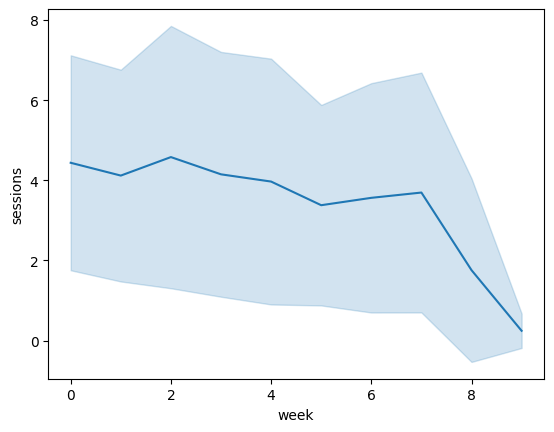

In [5]:
ax = sns.lineplot(data=ts, x="week", y="sessions", errorbar='sd')
plt.show()

### H2: There is no difference between males and females in terms of the number of sessions.

In [6]:
ts = ts.merge(df[['user','gender']], how='left', on='user')

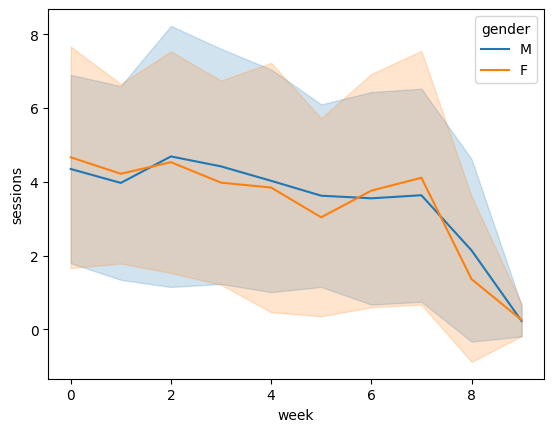

In [7]:
ax = sns.lineplot(data=ts, x="week", y="sessions",errorbar='sd', hue = 'gender')

## Your turn

In [8]:
import requests

exec(requests.get("https://courdier.pythonanywhere.com/get-send-code").content)

npt_config = {
    'session_name': 'lecture-02',
    'session_owner': 'mlbd',
    'sender_name': input("Your name: "),
}

Your name:  Paola


In [9]:
### Write briefly your question or hypothesis as a string
rq = """ 
This is an example hypothesis
"""

### Share it with us
send(rq, 1) 


<Response [200]>

<string>:57: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error in 3.6


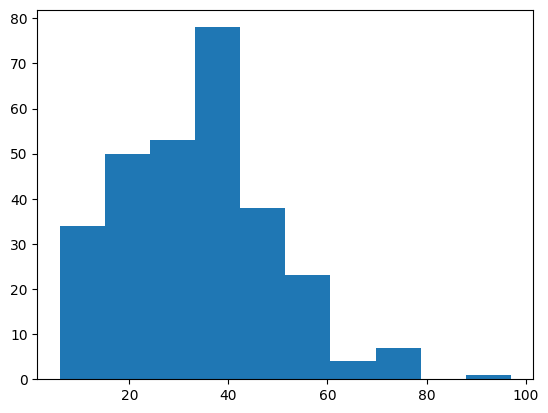

<Response [200]>

In [10]:
### Plot it and share it with us

# Example plot (do a better one!)
plt.hist(df.sessions)

send(plt, 2)
plt.show()

### Discuss briefly as a string what you observed: can you confirm your hypothesis?
hy = """This is an example discussion"""

### Share it with us
send(hy, 3) 